# Exemplo: Modelo cinético de reação de isomerização

## Introdução:


O problema aborado refere-se a pirólise do biciclohexano na fase de vapor, numa faixa de temperatura de 327 à 366 ºC, tendo como resultado a produção da substância 1,5-hexadieno.

O presente estudo faz parte de uma investigação sistemática da pirólise de compostos bicíclicos e tem como objetivo ajudar a identificar as reações de origem térmica nos sitemas fotoquímicos em que compostos como o 1,5-hexadieno, são gerados.

Na tabela a seguir, tem-se alguns resultados experimentais obtidos durante o processo de reação:

                                               
                                               
  Temperatura (°C) | Pressâo do reagente (mm) | Tempo (min) | Fração do reagente (%) |       $k$ x $10^{5}$
  :-------------: |  :----------------------: |:-----------:|:---------------------: |:------------------------:
         327.2    |         18.4                        |120              |90.0                  |1.46 
                  |         18.3                        |60.0             |94.9                  |1.43
         338.9    |         18.3                        |60.0             |88.6                  |3.37
                  |         18.1                        |120              |78.5                  |3.36
                  |         18.9                        |120              |79.1                  |3.25
                  |         18.6                        |60.0             |89.0                  |3.44
                  |         22.5                        |60               |78.7                  |6.64  
                  |         19.9                        |45.0             |69.5                  |13.5
         366.3    |         24.3                        |15.0             |80.8                  |23.6
           
           
           







Exemplo retirado de Schwaab e Pinto (2007) que trata sobre a estimação de parâmetros do modelo cinético:

$y = \exp\left[-t\cdot \exp\left(K_0-\frac{E}{T}\right)\right]$,                  (1)

em que $y$ é a fração que resta do reagente, $t$ é o tempo, $T$ é a temperatura, por fim $k_o$ e $E$ são os parâmetros a serem estimados.


O problema de otimização a ser resolvido, envolve o uso da função objetivo de mínimos quadrados ponderados pelo inverso da variância, conforme:

$\min_{ko,E} \sum_{i=1}^{NE} \left(\frac{y^{exp}_i-y_i(k_o,E)}{u^2_{y_i}}\right)$ (2)

sujeito à (1).

![Reação de Pirólise](https://drive.google.com/file/d/1HJohHVcX4PmE56eKGoBelnQgcyNm0yUE/view)


## Importação de pacotes

Importação de bibliotecas (pacotes) necessárias para execução do código.

* **MT_PEU**: biblioteca que contém as principais funcionalidades da ferramenta

    * Importar a classe **EstimacaoNaoLinear**, que será utilizada neste exemplo de estimação não linear

* **numpy**: biblioteca para computação científica

    * será necessária somente a função **exp** (exponencial) para construção do modelo


In [1]:
from MT_PEU import EstimacaoNaoLinear
from numpy import exp

## Criação de modelo

O modelo (1) representa o comportamento da variável de saída, no qual os parâmetros $k_o$ e $E$ serão estimados.

Este modelo é definido, então, na forma de uma subrotina, **def**, do python e representado por:

In [2]:
def modelo (param, x, args):

    tempo = x[:,0:1] # primeira coluna do vetor de dado
    T     = x[:,1:2] # segunda coluna do vetor de dados

    ko = param[0] # primeiro parâmetro
    E  = param[1] # segundo parâmetro

    y = exp(-tempo*exp(ko-E/T)) # cálculo de y - vetorizado

    return y

## Inicialização de classe

Para executar a estimação, o primeiro passo é configurar a classe **EstimacaoNaoLinear**, inicialmente, incluindo informações básicas: o modelo, símbolo para as grandeza independente (x), ....



Neste exemplo apresentamos alumas possíveis entradas opcionais, como unidades, assim como a opção de renomear a pasta onde são gerados os aquivos com os resultados.

No exemplo abaixo, onde o nome da pasta foi alterado para 'Teste1'.


In [3]:
Estime = EstimacaoNaoLinear(modelo, simbolos_x=[r't','T'], unidades_x=['s','K'],
                            simbolos_y=[r'y'], unidades_y=['adm'],
                            simbolos_param=['ko','E'], unidades_param=['adm','K'], projeto='Teste1')


## Inclusão de dados

Os dados experimentais apresentados em ....... da variável dependente (y) e das variáveis independentes (t e T)
são disponibilizados em Schwaab e Pinto (2007, p.326), e apresentados abaixo na forma de listas:


In [4]:
#Tempo
tempo = [120.0,60.0,60.0,120.0,120.0,60.0,60.0,30.0,15.0,60.0,
45.1,90.0,150.0,60.0,60.0,60.0,30.0,90.0,150.0,90.4,120.0,
60.0,60.0,60.0,60.0,60.0,60.0,30.0,45.1,30.0,30.0,45.0,15.0,30.0,90.0,25.0,
60.1,60.0,30.0,30.0,60.0]

#Temperatura
temperatura = [600.0,600.0,612.0,612.0,612.0,612.0,620.0,620.0,620.0,
620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,620.0,
620.0,620.0,620.0,620.0,620.0,620.0,631.0,631.0,631.0,631.0,631.0,639.0,639.0,
639.0,639.0,639.0,639.0,639.0,639.0,639.0]

y = [0.9,0.949,0.886,0.785,0.791,0.890,0.787,0.877,0.938,
0.782,0.827,0.696,0.582,0.795,0.800,0.790,0.883,0.712,0.576,0.715,0.673,
0.802,0.802,0.804,0.794,0.804,0.799,0.764,0.688,0.717,0.802,0.695,0.808,
0.655,0.309,0.689,0.437,0.425,0.638,.659,0.449]

Como entrada obrigatória, a plataforma MT_PEU necessita da **incerteza dos dados experimentais** (ux1, ux2, uy1).
Neste exemplo, foram adotados o valor 1 para as incertezas.

In [5]:
uxtempo = [1]*41
uxtemperatura = [1]*41
uy = [1]*41

Inclusão de dados experimentais na estimação:
Inclui os dados experimentais nesse objeto *(setDados)*, onde a opção 0 é para a grandeza dependente,
e a opção 1 é para a grandeza independente.


In [6]:
Estime.setDados(0,(tempo,uxtempo),(temperatura,uxtemperatura))
Estime.setDados(1,(y,uy))

Define que os dados experimentais previamente inseridos serão utilizados como um conjunto de dados para o qual os 
parâmetros serão estimados:

In [7]:
Estime.setConjunto()

## Otimização

Neste exemplo, o usuário tem a opção de escolha do algoritmo a ser utilizado na otimização. 
Disponiveis: 'Nelder-Mead', 'Powell', 'BFGS', 'L-BFGS-B', 'CG'. 
Caso opte por não escolher, será utilizado o algoritmo default: Nelder-Mead, com estimativa inicial em [0.03 , 20000.00].


In [8]:
Estime.otimiza(estimativa_inicial= [0.03, 20000.000],algoritmo='Nelder-Mead')
#Estime.SETparametro([3.900e+01, 2.764e+04])

## Incerteza


Neste exemplo é possível escolher o método útilizado para avaliar a incerteza 
Métodos disponíveis: 2InvHessiana, Geral, SensibilidadeModelo. 
Por definição o preenchimeto da região de verossimilhança é 'True', caso necessário esta opção pode ser alterada.


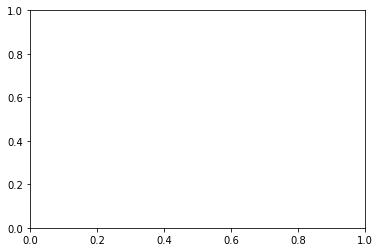

In [9]:
Estime.incertezaParametros(delta=1e-5,metodoIncerteza='2InvHessiana',preencherregiao=True)

## Predição de análise de resíduos

 No método predição, é feita a avaliação da grandeza dependente com base nos parâmetros fornecidos. 
 A covariância é avaliada, e consequentemente a eficiencia do modelo. 
 Em análise de residuos é possível verificar possíveis relações de dependencia e/ou tendencia entre as variaveis. 
 Testes estatisticos como o de homocedasticidade, $\chi^2$, dentre outros são realizados
 nesta etapa. A analise de residuos é feita prioritariamente com os dados de validação.


In [10]:
Estime.predicao()
Estime.analiseResiduos()

## Gráficos e relatório

Nesta etapa ocorre a geração dos dados de saída do programa : relátorios e gráficos. 
Os gráficos são gerados de acordo com as etapas que foram realizadas. No relátorio contém informações a respeito.
dos testes estatisticos, função objetivo, matriz de covariância, status da otimização, dentre outros.


In [11]:
etapas = ['otimizacao','grandezas-entrada', 'predicao','grandezas-calculadas','analiseResiduos', 'regiaoAbrangencia']
Estime.graficos(etapas)
Estime.relatorio()

/home/giufba-admin/Documentos/MT_PEU/MT_PEU.py:2084: UserWarning: Os gráficos de otimizacao não puderam ser criados, o algoritmo de otimização utilizado não possui gráficos de desempenho OU o método otimizacao não foi executado.
  warn('Os gráficos de otimizacao não puderam ser criados, o algoritmo de otimização utilizado não possui gráficos de desempenho OU o método otimizacao não foi executado.',UserWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 360x240 with 0 Axes>

## Referências: 

SCHWAAB, M.M.;PINTO, J.C. Análise de Dados Experimentais I: Fundamentos da Estátistica e Estimação de Parâmetros. 
Rio de Janeiro: e-papers, 2007.

(foi citado?)
Avaliação de dados de medição — Guia para a expressão de incerteza de medição 
http://www.inmetro.gov.br/noticias/conteudo/iso_gum_versao_site.pdf 

(adequar)
https://pubs.acs.org/doi/pdf/10.1021/ja00904a011

